# Jupyter notebook demonstrating the use of additional PmagPy functions

To dos:

### ipmag functions to be made:

- ipmag.bootstrap_reversal_test (wrapper function that finds the 2 modes to the data and then applies ipmag.bootstrap_common_mean)
- ipmag.MM1990_reversal_test (wrapper function that finds the 2 modes to the data and then applies ipmag.watson_common_mean()
- ipmag.find_EI()
- ipmag.demag_magic()

### make it so that plots can optionally be saved out of 

- ipmag.bootstrap_fold_test
- ipmag.bootstrap_common_mean
- ipmag.watson_common_mean

### update ipmag.vgp_calc and ipmag.sb_vgp_calc so that column fields can be specified

### update function comments for aniso_depthplot and for new ones in notebook to match the style of the others

### ipmag/pmag functions that already exist that should be demonstrated:

- ~~ipmag.fishqq~~
- ipmag.squish (grab data out of a Fisher distribution. Squish it and plot it and then apply ipmag.find_EI) 
- ipmag.igrf (pull it out and plot it for a given location, use the pmag.pinc function to show the GAD inclination at specified (paleo) latitude)
- ipmag.vgp_calc (use this on some directional data and then plot using: ipmag.plot_pole
- ipmag.plot_vgp
- ipmag.sb_vgp_calc
- ipmag.download_magic

This Jupyter/IPython notebook demonstrates the use of a number of PmagPy functions within a notebook environment. The benefits of working within these notebooks include but are not limited to scientific reproducibility; coherent code development; convenient workspace for projects; and version control (when integrated with GitHub or other version control software).

### Table of Contents
**Miscellaneous**
* [The Dipole Equation](#The-dipole-equation)
* [Calculating the Angle Between Two Directions](#Angle-between-directions)
* [Fisher-Distributed Directions](#Generate-and-plot-Fisher-distributed-unit-vectors-from-a-specified-distribution)
* [Flip Directional Data](#Flip-polarity-of-directional-data)
* [Plotting and Analyzing Anisotropy Data](#Working-with-anisotropy-data)

**Using Matplotlib's Basemap Package**
* [Working with Poles](#Working-with-poles)

**Susceptibility Data Analysis**
* [Example Susceptibility Data Analysis](#Susceptibility-vs.-temperature,-applied-field-and-frequency)
* [Working with Curie Temperature Data](#Curie-temperature-data)

**Hysteresis Data**
* [Day Plots](#Day-plots)
* [Hysteresis Loops](#Hysteresis-Loops)

**Note: This notebook makes heavy use of pandas for reading, displaying, and using data. More information about the pandas module and its use within PmagPy can be found [here](http://earthref.org/PmagPy/cookbook/#x1-1850007.4) within the documentation of the [PmagPy cookbook](http://earthref.org/PmagPy/cookbook/).**

In [1]:
import sys, os
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
#sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/PmagPy/')
# USING FAIRCHILD FORK OF PMAGPY -- CONTINUAL PULL REQUESTS ARE MADE TO PMAGPY MASTER BUT MAY NOT BE UPDATED YET
sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/fairchild_PmagPy/')
import pmag, pmagplotlib, ipmag, ipmagplotlib, mplstereonet
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

## The dipole equation

In [2]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

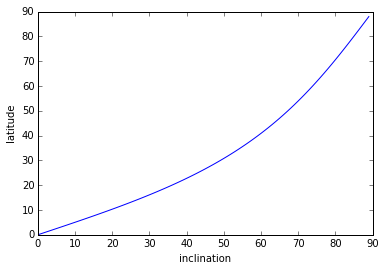

In [3]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [4]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

array([ 103.00072744])

## Generate and plot Fisher distributed unit vectors from a specified distribution

In [5]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,202.099338,31.658263,1
1,206.736422,34.792057,1
2,192.549983,17.797098,1
3,194.273141,29.747148,1
4,196.304175,24.144125,1


In [6]:
fisher_mean = ipmag.fisher_mean(directions.dec,directions.inc)
bingham_mean = ipmag.bingham_mean(directions.dec,directions.inc)

ipmag.print_direction_mean(fisher_mean)

Dec: 199.6  Inc: 32.2
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 43.9


Dec: 199.6  Inc: 32.2
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 43.9


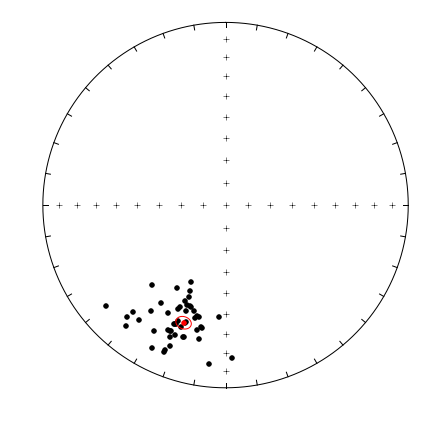

In [7]:
declinations, inclinations = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30, DIBlock=False)

plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(fisher_mean['dec'],fisher_mean['inc'],fisher_mean['alpha95'],color='r')

# print out the raw fisher mean data above the equal area plot
ipmag.print_direction_mean(fisher_mean)

## Flip polarity of directional data

Let's resolve the antipodes of the Fisher-distributed directions we just created using the function flip() function.

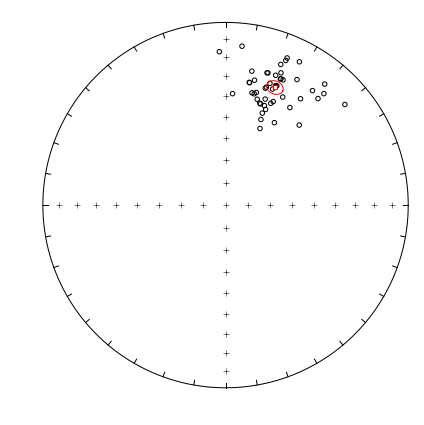

In [8]:
# get reversed directions
reverse = ipmag.flip(ipmag.make_di_block(declinations,inclinations))
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the directions in opposite polarity
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

## Test directional data for Fisher distribution

The ipmag function fishqq tests whether directional data is Fisher-distributed. Let's use this test on the random Fisher-distributed directions we just created (it should pass!). 

{'Dec': 202.7134004280253,
 'Inc': 30.901908998874269,
 'Me': 0.75412206340811372,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 1.2496302465692704,
 'Mu_critical': 1.207,
 'N': 50,
 'Test_result': 'Fisherian model rejected'}

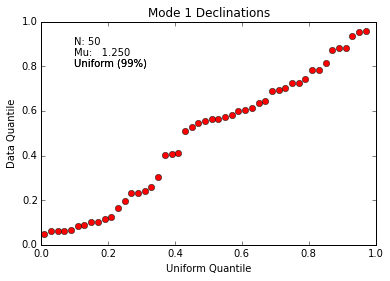

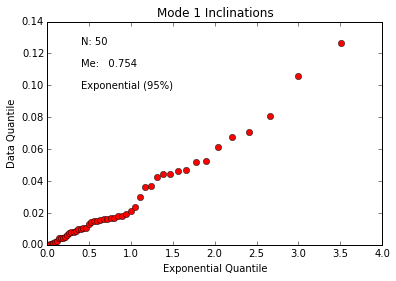

In [9]:
ipmag.fishqq(declinations, inclinations)

## Squish directional data

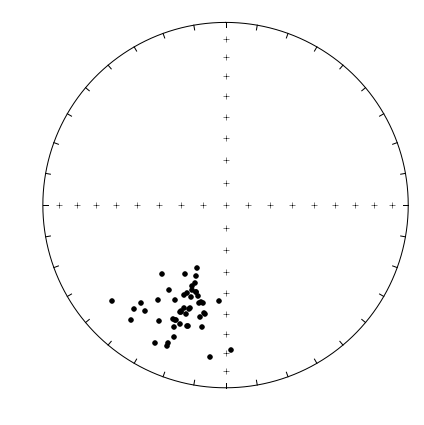

In [10]:
# squish all inclinations
squished_incs = []
for inclination in inclinations:
    squished_incs.append(ipmag.squish(1.3, inclination))

# plot the squished directional data
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,squished_incs)
squished_DIs = np.array(zip(declinations,squished_incs))

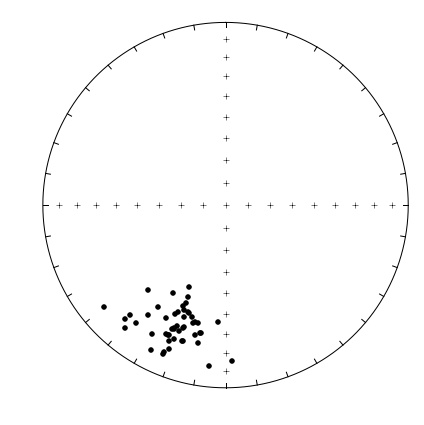

In [11]:
@interact
def squish_interactive(factor=(0.,2.,.1)):
    squished_incs = []
    for inclination in inclinations:
        squished_incs.append(ipmag.squish(factor, inclination))

    # plot the squished directional data
    plt.figure(num=1,figsize=(6,6))
    ipmag.plot_net(1)
    ipmag.plot_di(declinations,squished_incs)

## Unsquish directional data

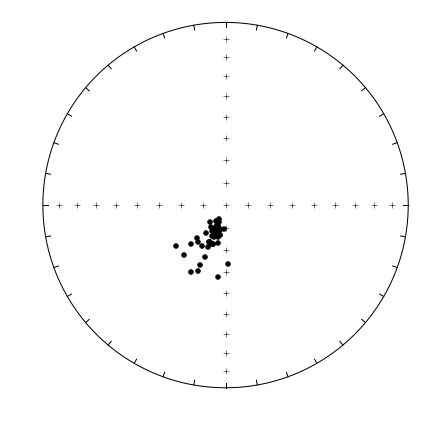

In [12]:
unsquished_incs = []
for squished_inc in squished_incs:
    unsquished_incs.append(ipmag.unsquish(.2, squished_inc))

# plot the squished directional data
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,unsquished_incs)

In [13]:
bipolar_dirs = directions.append(rev_directions)
bipolar_dirs.reset_index(inplace=True, drop='index')
bipolar_dirs.head()

,dec,inc,length
0,202.099338,31.658263,1
1,206.736422,34.792057,1
2,192.549983,17.797098,1
3,194.273141,29.747148,1
4,196.304175,24.144125,1


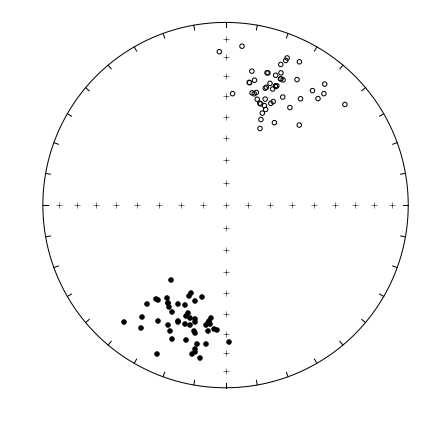

In [14]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(bipolar_dirs.dec,bipolar_dirs.inc)

In [35]:
def bootstrap_reversal_test(D, I=None):
    if I == None:
        dec = []
        inc = []
        for i in range(len(D)):
            dec.append(D[i][0])
            inc.append(D[i][1])
        girdle = mplstereonet.fit_girdle(dec, inc)
    else:
        dec = D
        inc = I
        girdle = mplstereonet.fit_girdle(dec,inc)
    for direction in D:

In [37]:
bootstrap_reversal_test(bipolar_dirs.dec.tolist(), bipolar_dirs.inc.tolist())

(291.81451411206183, 89.555056076042504)

In [31]:
360-291

69

In [ ]:
new_dirs1, new_dirs2 = pmag.flip(zip(bipolar_dirs.dec,bipolar_dirs.inc))
new_dirs1

In [ ]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
new_decs = []
new_incs = []
for n in new_dirs2:
    new_decs.append(n[0])
    new_incs.append(n[1])
ipmag.plot_di(new_decs, new_incs)

In [ ]:
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
bipolar_decs = []
bipolar_incs = []
for n in BDIs:
    bipolar_decs.append(n[0])
    bipolar_incs.append(n[1])
ipmag.plot_di(bipolar_decs, bipolar_incs)

In [ ]:
from IPython.display import clear_output

def EI(inc):
    poly_tk03= [  3.15976125e-06,  -3.52459817e-04,  -1.46641090e-02,   2.89538539e+00]  
    return poly_tk03[0]*inc**3 + poly_tk03[1]*inc**2+poly_tk03[2]*inc+poly_tk03[3]


def find_f(data):
    rad=np.pi/180.
    Es,Is,Fs,V2s=[],[],[],[]
    ppars = pmag.doprinc(data)
    D=ppars['dec']
    Decs,Incs=data.transpose()[0],data.transpose()[1]
    Tan_Incs=np.tan(Incs*rad)
    for f in np.arange(1.,.2 ,-.01):
        U=np.arctan((1./f)*Tan_Incs)/rad
        fdata=np.array([Decs,U]).transpose()
        ppars=pmag.doprinc(fdata)
        Fs.append(f)
        Es.append(ppars["tau2"]/ppars["tau3"])
        angle=pmag.angle([D,0],[ppars["V2dec"],0])
        if 180.-angle<angle:angle=180.-angle
        V2s.append(angle)
        Is.append(abs(ppars["inc"]))
        if EI(abs(ppars["inc"]))<=Es[-1]:
            del Es[-1]
            del Is[-1]
            del Fs[-1]
            del V2s[-1]
            if len(Fs)>0:
                for f in np.arange(Fs[-1],.2 ,-.005):
                    U=np.arctan((1./f)*Tan_Incs)/rad
                    fdata=np.array([Decs,U]).transpose()
                    ppars=pmag.doprinc(fdata)
                    Fs.append(f)
                    Es.append(ppars["tau2"]/ppars["tau3"])
                    Is.append(abs(ppars["inc"]))
                    angle=pmag.angle([D,0],[ppars["V2dec"],0])
                    if 180.-angle<angle:angle=180.-angle
                    V2s.append(angle)
                    if EI(abs(ppars["inc"]))<=Es[-1]:
                        return Es,Is,Fs,V2s
    return [0],[0],[0],[0]

def find_EI(data=None, path_to_file = '.', file_name = 'magic_measurements.txt', 
            save = False, save_folder = '.', fmt='svg'):
    """
    NAME
        find_EI.py
 
    DESCRIPTION
        Applies series of assumed flattening factor and "unsquishes" inclinations assuming tangent function.
        Finds flattening factor that gives elongation/inclination pair consistent with TK03.  
        Finds bootstrap confidence bounds

    SYNTAX
        find_EI.py [command line options]

    OPTIONS
        -h prints help message and quits
        -i allows interactive input of file name
        -f FILE specify input file name
        -nb N specify number of bootstraps - the more the better, but slower!, default is 1000
        -fmt [svg,png,eps,pdf..] change plot format, default is svg
        -sav  saves the figures and quits

    INPUT
        dec/inc pairs, delimited with space or tabs

    OUTPUT
        four plots:  1) equal area plot of original directions
                      2) Elongation/inclination pairs as a function of f,  data plus 25 bootstrap samples
                      3) Cumulative distribution of bootstrapped optimal inclinations plus uncertainties.
                         Estimate from original data set plotted as solid line
                      4) Orientation of principle direction through unflattening
    NOTE: If distribution does not have a solution, plot labeled: Pathological.  Some bootstrap samples may have
       valid solutions and those are plotted in the CDFs and E/I plot.

    """
    fmt,nb='svg',1000
    plot=0
    if '-i' in sys.argv:
        file=raw_input("Enter file name for processing: ")
    if '-h' in sys.argv:
        print main.__doc__
        sys.exit() # graceful quit
    elif '-f' in sys.argv:
        ind=sys.argv.index('-f')
        file=sys.argv[ind+1]
    else:
        print main.__doc__
        sys.exit()
    if '-nb' in sys.argv:
        ind=sys.argv.index('-nb')
        nb=int(sys.argv[ind+1])
    if '-fmt' in sys.argv:
        ind=sys.argv.index('-fmt')
        fmt=sys.argv[ind+1]
    if '-sav' in sys.argv:plot=1
    if data == None:
        file = os.path.join(path_to_file,file_name)
        data=np.loadtxt(file)
    else:
        data = data
    upper,lower=int(round(.975*nb)),int(round(.025*nb))
    E,I=[],[]
    PLTS={'eq':1,'ei':2,'cdf':3,'v2':4}
    plt.figure(num=PLTS['eq'], figsize=(6,6))
    plt.figure(num=PLTS['ei'], figsize=(5,5))
    plt.figure(num=PLTS['cdf'], figsize=(5,5))
    plt.figure(num=PLTS['v2'], figsize=(5,5))
    pmagplotlib.plotEQ(PLTS['eq'],data,'Data')
    if plot==0:
        pmagplotlib.drawFIGS(PLTS)
    ppars=pmag.doprinc(data)
    Io=ppars['inc']
    n=ppars["N"]
    Es,Is,Fs,V2s=find_f(data)
    Inc,Elong=Is[-1],Es[-1]
    pmagplotlib.plotEI(PLTS['ei'],Es,Is,Fs[-1])
    pmagplotlib.plotV2s(PLTS['v2'],V2s,Is,Fs[-1])
    b=0
    print "Bootstrapping.... be patient"
    while b < nb:
        bdata = pmag.pseudo(data)
        Es,Is,Fs,V2s = find_f(bdata)
        if b<25:
            pmagplotlib.plotEI(PLTS['ei'],Es,Is,Fs[-1])
        if Es[-1] != 0:
            ppars=pmag.doprinc(bdata)
            I.append(abs(Is[-1]))
            E.append(Es[-1])
            b += 1
            if b%25==0:
                print b,'out of',nb;
    I.sort()
    E.sort()
    Eexp=[]
    for i in I:
        Eexp.append(EI(i)) 
    if Inc==0:
        title= 'Pathological Distribution: '+'[%7.1f, %7.1f]' %(I[lower],I[upper])
    else:
        title= '%7.1f [%7.1f, %7.1f]' %( Inc, I[lower],I[upper])
    pmagplotlib.plotEI(PLTS['ei'],Eexp,I,1)
    pmagplotlib.plotCDF(PLTS['cdf'],I,'Inclinations','r',title)
    pmagplotlib.plotVs(PLTS['cdf'],[I[lower],I[upper]],'b','--')
    pmagplotlib.plotVs(PLTS['cdf'],[Inc],'g','-')
    pmagplotlib.plotVs(PLTS['cdf'],[Io],'k','-')
    if plot==0:
        pmagplotlib.drawFIGS(PLTS)
        print "Io Inc  I_lower, I_upper, Elon, E_lower, E_upper"
        print '%7.1f %s %7.1f _ %7.1f ^ %7.1f:  %6.4f _ %6.4f ^ %6.4f'%(Io, " => ", Inc, I[lower],I[upper], Elong, E[lower],E[upper])
        ans= raw_input("S[a]ve plots - <return> to quit:  ")
        if ans!='a':
            print "\n Good bye\n"
            sys.exit()
    files={}
    files['eq']='findEI_eq.'+fmt
    files['ei']='findEI_ei.'+fmt
    files['cdf']='findEI_cdf.'+fmt
    files['v2']='findEI_v2.'+fmt
    #pmagplotlib.saveP(PLTS,files)

Let's test the find_EI() function on our squished directional data.

In [ ]:
find_EI(path_to_file = 'PmagPy_Datafiles/find_EI/', file_name= 'find_EI_example.dat')

## Working with anisotropy data

In [ ]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

In [ ]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');

## Working with poles

A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with paleomagnetic poles, virtual geomagnetic poles, and polar wander paths.

In [ ]:
# initiate figure and specify figure size
plt.figure(figsize=(6, 6))

# initiate a Basemap projection, specifying the latitude and
# longitude (lat_0 and lon_0) at which our figure is centered.
pmap = Basemap(projection='ortho',lat_0=30,lon_0=320,
               resolution='c',area_thresh=50000)
# other optional modifications to the globe figure
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))


# Here we plot a pole at 340 E longitude, 30 N latitude with an
# alpha 95 error angle of 5 degrees. Keyword arguments allow us
# to specify the label, shape, and color of this data.
ipmag.plot_pole(pmap,340,30,5,label='VGP examples',
               marker='s',color='Blue')

# We can plot multiple poles sequentially on the same globe using
# the same plot_pole function.
ipmag.plot_pole(pmap,290,-3,9,marker='s',color='Blue')

plt.legend()
# Optional save (uncomment to save the figure)
#plt.savefig('Code_output/VGP_example.pdf')
plt.show()

The capability to plot multiple poles in sequence provides a good way to analyze polar wander paths. Here we use the Phanerozoic APWP of Laurentia *(Torsvik, 2012)* to demonstrate the plot_pole_colorbar function.

We first upload the Torsvik (2012) data using the pandas function *read_csv*. 

In [ ]:
Laurentia_Pole_Compilation = pd.read_csv('PmagPy_Datafiles/plot_pole_colorbar/Laurentia_Pole_Compilation.csv')
Laurentia_Pole_Compilation.head()

In [ ]:
# initiate the figure as in the plot_pole example
plt.figure(figsize=(8, 8))
pmap = Basemap(projection='ortho',lat_0=25,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for n in xrange (0, len(Laurentia_Pole_Compilation)):
     m = ipmag.plot_pole_colorbar(pmap, Laurentia_Pole_Compilation['CLon'][n],
                                  Laurentia_Pole_Compilation['CLat'][n],
                                  Laurentia_Pole_Compilation['A95'][n],
                                  -Laurentia_Pole_Compilation['Age'][n],
                                  -532,
                                  -300,
                                  markersize=80, color="k", alpha=1)

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

# Optional save (uncomment to save the figure)
#plt.savefig('Notebook_Output/plot_pole_colorbar_example.pdf')

plt.show()

## Susceptibility vs. temperature, applied field and frequency

This example makes use of the PmagPy function **chi_magic.py**.

In [ ]:
ipmag.chi_magic(path_to_file='./PmagPy_Datafiles/chi_magic/',
          file_name='chi_magic_example.dat', save=True, 
          save_folder='Notebook_Output')

## Curie temperature data

In [ ]:
ipmag.curie(path_to_file='./PmagPy_Datafiles/curie/',file_name='curie_example.dat', save=True, save_folder='Notebook_Output')

IPy Widgets are part of what makes the Jupyter notebook environment so powerful -- these widgets allow user interaction with figures. Below, we demonstrate how the above figures can be made interactive by passing the *curie* function's parameters to the ipy widget *interact*.

*Note: If you do not have the ipywidgets package installed, you may choose to either install it through Anaconda or Enthought (depending on your Python distribution), manually install it (a bit more difficult), or simply skip the next block of code.*

In [ ]:
interact(ipmag.curie, path_to_file='./PmagPy_Datafiles/curie/',file_name='curie_example.dat',window_length = (1,60));

## Day plots

Demonstration of Day plots, squareness/coercivity and squareness/coercivity of remanence diagrams using hysteresis data.

In [ ]:
ipmag.dayplot(path_to_file='./PmagPy_Datafiles/dayplot_magic/', 
              hyst_file='dayplot_magic_example.dat',
              save=True,save_folder='Notebook_Output/');

## Hysteresis Loops

In [ ]:
def hysteresis_magic(path_to_file = '.',hyst_file="rmag_hysteresis.txt", 
                     save = False, save_folder = '.', fmt = "svg"):
    """
    Calculates hysteresis parameters, saves them in rmag_hysteresis format file,
    and makes hysteresis plots if option selected.
    
    Optional Keywords (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'pdf')
    """
    args=sys.argv
    PLT=1
    plots=0
    user,meas_file,rmag_out,rmag_file="","agm_measurements.txt","rmag_hysteresis.txt",""
    pltspec=""
    dir_path='.'
    verbose=pmagplotlib.verbose
    version_num=pmag.get_version()
    rmag_out=dir_path+'/'+rmag_out
    meas_file=path_to_file+'/'+hyst_file
    rmag_rem=dir_path+"/rmag_remanence.txt"
    #
    #
    meas_data,file_type=pmag.magic_read(meas_file)
    if file_type!='magic_measurements':
        print hysteresis_magic.__doc__
        print 'bad file'
        sys.exit()
    #
    # initialize some variables
    # define figure numbers for hyst,deltaM,DdeltaM curves
    HystRecs,RemRecs=[],[]
    HDD={}
    if verbose:
        if verbose and PLT:print "Plots may be on top of each other - use mouse to place "
    if PLT:
        HDD['hyst'],HDD['deltaM'],HDD['DdeltaM']=1,2,3
        plt.figure(num=HDD['DdeltaM'],figsize=(5,5))
        plt.figure(num=HDD['deltaM'],figsize=(5,5))
        plt.figure(num=HDD['hyst'],figsize=(5,5))
        imag_init=0
        irm_init=0
    else:
        HDD['hyst'],HDD['deltaM'],HDD['DdeltaM'],HDD['irm'],HDD['imag']=0,0,0,0,0
    #
    if rmag_file!="":hyst_data,file_type=pmag.magic_read(rmag_file)
    #
    # get list of unique experiment names and specimen names
    #
    experiment_names,sids=[],[]
    for rec in meas_data: 
        meths=rec['magic_method_codes'].split(':')
        methods=[]
        for meth in meths:
            methods.append(meth.strip())
        if 'LP-HYS' in methods:
            if 'er_synthetic_name' in rec.keys() and rec['er_synthetic_name']!="":
                rec['er_specimen_name']=rec['er_synthetic_name']
            if rec['magic_experiment_name'] not in experiment_names:experiment_names.append(rec['magic_experiment_name'])
            if rec['er_specimen_name'] not in sids:sids.append(rec['er_specimen_name'])
    #
    k=0
    locname=''
    if pltspec!="":
        k=sids.index(pltspec)
        print sids[k]
    while k < len(sids):
        s=sids[k]
        if verbose and PLT:print s, k+1 , 'out of ',len(sids)
    #
    #
        B,M,Bdcd,Mdcd=[],[],[],[] #B,M for hysteresis, Bdcd,Mdcd for irm-dcd data
        Bimag,Mimag=[],[] #Bimag,Mimag for initial magnetization curves
        first_dcd_rec,first_rec,first_imag_rec=1,1,1
        for rec in  meas_data:
            methcodes=rec['magic_method_codes'].split(':')
            meths=[]
            for meth in methcodes:
                meths.append(meth.strip()) 
            if rec['er_specimen_name']==s and "LP-HYS" in meths:
                B.append(float(rec['measurement_lab_field_dc']))
                M.append(float(rec['measurement_magn_moment']))
                if first_rec==1:
                    e=rec['magic_experiment_name']
                    HystRec={}
                    first_rec=0
                    if "er_location_name" in rec.keys():
                        HystRec["er_location_name"]=rec["er_location_name"]
                        locname=rec['er_location_name'].replace('/','-')
                    if "er_sample_name" in rec.keys():HystRec["er_sample_name"]=rec["er_sample_name"]
                    if "er_site_name" in rec.keys():HystRec["er_site_name"]=rec["er_site_name"]
                    if "er_synthetic_name" in rec.keys() and rec['er_synthetic_name']!="":
                        HystRec["er_synthetic_name"]=rec["er_synthetic_name"]
                    else:
                        HystRec["er_specimen_name"]=rec["er_specimen_name"]
            if rec['er_specimen_name']==s and "LP-IRM-DCD" in meths:
                Bdcd.append(float(rec['treatment_dc_field']))
                Mdcd.append(float(rec['measurement_magn_moment']))
                if first_dcd_rec==1:
                    RemRec={}
                    irm_exp=rec['magic_experiment_name']
                    first_dcd_rec=0
                    if "er_location_name" in rec.keys():RemRec["er_location_name"]=rec["er_location_name"]
                    if "er_sample_name" in rec.keys():RemRec["er_sample_name"]=rec["er_sample_name"]
                    if "er_site_name" in rec.keys():RemRec["er_site_name"]=rec["er_site_name"]
                    if "er_synthetic_name" in rec.keys() and rec['er_synthetic_name']!="":
                        RemRec["er_synthetic_name"]=rec["er_synthetic_name"]
                    else:
                        RemRec["er_specimen_name"]=rec["er_specimen_name"]
            if rec['er_specimen_name']==s and "LP-IMAG" in meths:
                if first_imag_rec==1:
                    imag_exp=rec['magic_experiment_name']
                    first_imag_rec=0
                Bimag.append(float(rec['measurement_lab_field_dc']))
                Mimag.append(float(rec['measurement_magn_moment']))
    #
    # now plot the hysteresis curve
    #
        if len(B)>0: 
            hmeths=[]
            for meth in meths: hmeths.append(meth)  
            hpars=pmagplotlib.plotHDD(HDD,B,M,e) 
            if verbose and PLT:pmagplotlib.drawFIGS(HDD)
    #
    # get prior interpretations from hyst_data
            if rmag_file!="":
                hpars_prior={}
                for rec in hyst_data:
                    if rec['magic_experiment_names']==e:
                        if rec['hysteresis_bcr'] !="" and rec['hysteresis_mr_moment']!="": 
                            hpars_prior['hysteresis_mr_moment']=rec['hysteresis_mr_moment']
                            hpars_prior['hysteresis_ms_moment']=rec['hysteresis_ms_moment']
                            hpars_prior['hysteresis_bc']=rec['hysteresis_bc']
                            hpars_prior['hysteresis_bcr']=rec['hysteresis_bcr']
                            break
                if verbose:pmagplotlib.plotHPARS(HDD,hpars_prior,'ro')
            else:
                if verbose:pmagplotlib.plotHPARS(HDD,hpars,'bs')
                HystRec['hysteresis_mr_moment']=hpars['hysteresis_mr_moment']
                HystRec['hysteresis_ms_moment']=hpars['hysteresis_ms_moment']
                HystRec['hysteresis_bc']=hpars['hysteresis_bc']
                HystRec['hysteresis_bcr']=hpars['hysteresis_bcr']
                HystRec['hysteresis_xhf']=hpars['hysteresis_xhf']
                HystRec['magic_experiment_names']=e
                HystRec['magic_software_packages']=version_num
                if hpars["magic_method_codes"] not in hmeths:hmeths.append(hpars["magic_method_codes"])
                methods=""
                for meth in hmeths:
                    methods=methods+meth.strip()+":"
                HystRec["magic_method_codes"]=methods[:-1]
                HystRec["er_citation_names"]="This study"
                HystRecs.append(HystRec)
    #
        if len(Bdcd)>0: 
            rmeths=[]
            for meth in meths: rmeths.append(meth)
            if verbose and PLT:print 'plotting IRM'
            if irm_init==0:
                HDD['irm']=5
                plt.figure(num=HDD['irm'],figsize=(5,5))
                irm_init=1
            rpars=pmagplotlib.plotIRM(HDD['irm'],Bdcd,Mdcd,irm_exp) 
            RemRec['remanence_mr_moment']=rpars['remanence_mr_moment']
            RemRec['remanence_bcr']=rpars['remanence_bcr']
            RemRec['magic_experiment_names']=irm_exp
            if rpars["magic_method_codes"] not in meths:meths.append(rpars["magic_method_codes"])
            methods=""
            for meth in rmeths:
                methods=methods+meth.strip()+":"
            RemRec["magic_method_codes"]=methods[:-1]
            RemRec["er_citation_names"]="This study"
            RemRecs.append(RemRec)
        else: 
            if irm_init:pmagplotlib.clearFIG(HDD['irm'])
        if len(Bimag)>0: 
            if verbose:print 'plotting initial magnetization curve'
# first normalize by Ms
            Mnorm=[]
            for m in Mimag: Mnorm.append(m/float(hpars['hysteresis_ms_moment']))
            if imag_init==0:
                HDD['imag']=4
                plt.figure(num=HDD['imag'],figsize=(5,5))
                imag_init=1
            pmagplotlib.plotIMAG(HDD['imag'],Bimag,Mnorm,imag_exp) 
        else: 
            if imag_init:pmagplotlib.clearFIG(HDD['imag'])
    #
        files={}
        if plots:
            if pltspec!="":s=pltspec
            files={}
            for key in HDD.keys():
                files[key]=locname+'_'+s+'_'+key+'.'+fmt
            pmagplotlib.saveP(HDD,files)
            if pltspec!="":sys.exit()
        if verbose and PLT:
            pmagplotlib.drawFIGS(HDD)
            ans=raw_input("S[a]ve plots, [s]pecimen name, [q]uit, <return> to continue\n ")
            if ans=="a":
                files={}
                for key in HDD.keys():
                    files[key]=locname+'_'+s+'_'+key+'.'+fmt
                pmagplotlib.saveP(HDD,files)
            if ans=='':k+=1
            if ans=="p":
                del HystRecs[-1]
                k-=1
            if  ans=='q': 
                print "Good bye"
                sys.exit()
            if ans=='s':
                keepon=1
                specimen=raw_input('Enter desired specimen name (or first part there of): ')
                while keepon==1:
                    try:
                        k =sids.index(specimen)
                        keepon=0
                    except:
                        tmplist=[]
                        for qq in range(len(sids)):
                            if specimen in sids[qq]:tmplist.append(sids[qq])
                        print specimen," not found, but this was: "
                        print tmplist
                        specimen=raw_input('Select one or try again\n ')
                        k =sids.index(specimen)
        else:
            k+=1
        if len(B)==0 and len(Bdcd)==0:
            if verbose:print 'skipping this one - no hysteresis data'
            k+=1
    if rmag_out=="" and ans=='s' and verbose:
        really=raw_input(" Do you want to overwrite the existing rmag_hystersis.txt file? 1/[0] ")
        if really=="":
            print 'i thought not - goodbye'
            sys.exit()
        rmag_out="rmag_hysteresis.txt"
    if len(HystRecs)>0 and verbose:
        pmag.magic_write(rmag_out,HystRecs,"rmag_hysteresis")
        print "hysteresis parameters saved in ",rmag_out
    if len(RemRecs)>0 and verbose:
        pmag.magic_write(rmag_rem,RemRecs,"rmag_remanence")
        print "remanence parameters saved in ",rmag_rem

In [ ]:
hysteresis_magic(path_to_file='./PmagPy_Datafiles/hysteresis_magic/',hyst_file='hysteresis_magic_example.dat')